In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 데이터 셋 로드
df = pd.read_csv('creditcard.csv')

# 2. 특성과 레이블 분리
X = df.drop('Class', axis=1)
y = df['Class']

# 3. 데이터 분할 (학습 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 5. 모델 학습 - 랜덤 포레스트 분류기
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# 6. 평가지표
y_pred = model.predict(X_test_scaled)

print("정확도:",accuracy_score(y_test, y_pred))
print("평가지표")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

정확도: 0.9995962220427653
평가지표
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     5]
 [   18    80]]


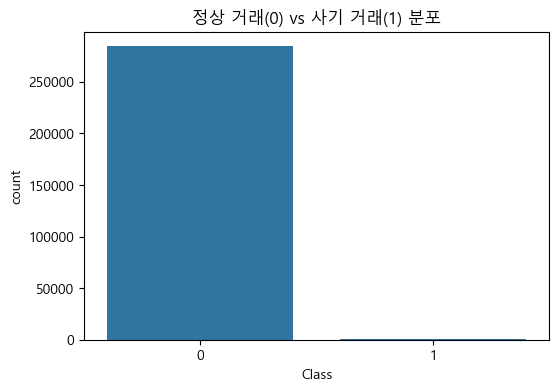

In [13]:
# Class 값 분포 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('정상 거래(0) vs 사기 거래(1) 분포')
plt.show()